In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy


## Case.011: Compute weighted average of thlp2

In [8]:
patch_qsfc = np.asarray([1.726832986199053E-002, 1.759567976518389E-002, 
              1.746236300667154E-002, 1.540402247484002E-002])

patch_tsfc = np.asarray([295.623232350756, 295.951372969894, 
              295.840483209516, 291.344846310922])

patch_thlp2 = np.asarray([1.030936768938763E-002, 2.036282320914031E-003, 
               1.004521156189157E-003, 2.249363961531671E-002])

patch_theta = np.asarray([298.737233240327, 299.127926976650, 
               298.991788294539, 294.082454672829])

In [9]:
patch_weights = np.asarray([0.959444020806179,5.546301946899949E-006,
                 3.229989980862636E-002,8.250533083248102E-003])


In [20]:
gridMean_theta = np.sum(patch_theta*patch_weights)/np.sum(patch_weights)

print(gridMean_theta)   # Same as first value in case.011 

gridMean_thlp2 = np.sum(patch_thlp2*patch_weights)/np.sum(patch_weights)
print(gridMean_thlp2)   # Same as first value in case.011 as well 


298.70705310541285
0.010109302932221356


In [24]:
thetaDiff2 = (patch_theta - gridMean_theta)**2
print(thetaDiff2)

[9.10840543e-04 1.77134815e-01 8.10741279e-02 2.13869107e+01]


In [25]:
final_thlp2 = gridMean_thlp2 + (np.sum(thetaDiff2*patch_weights)/np.sum(patch_weights))
print(final_thlp2)  # Same as first value in case.011 - so everything's working as expected right now

0.19005628606852865


## Case.014: Compute weighted average of qp2

In [2]:
# Brazil point 
patch_weights = np.asarray([0.959444020806179, 5.546301946899949E-006,
                 3.229989980862636E-002, 8.250533083248102E-003])

In [5]:
patch_qp2 = np.asarray([7.247735476447325E-010, 6.517994579379304E-010,
                       4.124415004887523E-014, 7.738030080858290E-008])

gridMean_qp2 = np.sum(patch_qp2*patch_weights)/np.sum(patch_weights)
print(gridMean_qp2)  # Same as in case.014, so all good here...  



1.3338133257976403e-09


In [7]:
patch_q = np.asarray([1.721413212113480E-002, 1.751243627086415E-002,
                     1.737798498597334E-002, 1.559908545581911E-002])

gridMean_q = np.sum(patch_q*patch_weights)/np.sum(patch_weights)
print('Grid mean Q: ', gridMean_q)  # Same as in case.014, so all good here too

patch_qdiff2 = np.asarray([6.449552089954679E-011, 9.384116902808559E-008, 
               2.954403216985011E-008, 2.582499636738017E-006])


Grid mean Q:  0.01720610121079415


In [12]:
final_qp2 = gridMean_qp2 + (np.sum(patch_qdiff2*patch_weights)/np.sum(patch_weights))
print(final_qp2)  # Again, same as in case.014, so all good on qp2 calculation (I think)


2.365748160856417e-08


## Case.015: Compute thlpqp

In [13]:
# Brazil point 
patch_weights = np.asarray([0.959444020806179, 5.546301946899949E-006,
                 3.229989980862636E-002, 8.250533083248102E-003])


In [15]:
patch_qp2 = np.asarray([7.247735476447325E-010, 6.517994579379304E-010,
                       4.124415004887523E-014, 7.738030080858290E-008])

patch_q = np.asarray([1.721413212113480E-002, 1.751243627086415E-002,
                     1.737798498597334E-002, 1.559908545581911E-002])


In [16]:
patch_thlp2 = np.asarray([1.183423361301271E-002,2.518596449027640E-003,
                         1.166880905890017E-003, 4.608696397543562E-002])

patch_tv = np.asarray([298.675871523140, 299.035625894819,
                      298.897451151873, 296.908569379262])


In [18]:
patch_thlpqp = (patch_qp2**0.5) * (patch_thlp2**0.5)
print('Patch thlpqp: ', patch_thlpqp)   # Matches output in case.015


Patch thlpqp:  [2.92867538e-06 1.28125712e-06 6.93736342e-09 5.97178628e-05]


In [22]:
gridMean_thlpqp = np.sum(patch_thlpqp*patch_weights)/np.sum(patch_weights)
print('Grid mean thlpqp: ',gridMean_thlpqp)   # Same as second value in case.015 as well 

gridMean_tv = np.sum(patch_tv*patch_weights)/np.sum(patch_weights)
gridMean_q = np.sum(patch_q*patch_weights)/np.sum(patch_weights)
print('Grid mean Tv:     ', gridMean_tv)
print('Grid mean Q:      ', gridMean_q)


Grid mean thlpqp:  3.302835466848168e-06
Grid mean Tv:      298.6684493334479
Grid mean Q:       0.01720610121079415


In [25]:
qDiff  = patch_q - gridMean_q
TvDiff = patch_tv - gridMean_tv

qTvDiff_sqr = qDiff*TvDiff
gridMean_qTvDiff = np.sum(qTvDiff_sqr*patch_weights)/np.sum(patch_weights)

print('TvDiff * Qdiff:   ', qDiff*TvDiff)
print('Grid mean: ', gridMean_qTvDiff)  # Matches case.015 

print('Final thlpqp: ', gridMean_thlpqp+gridMean_qTvDiff) # Matches case.015 


TvDiff * Qdiff:    [5.96069399e-08 1.12479054e-04 3.93616971e-05 2.82815481e-03]
Grid mean:  2.4662977087905792e-05
Final thlpqp:  2.796581255475396e-05


## Case.017: compute wp3

In [26]:
# Brazil point 
patch_weights = np.asarray([0.959444020806179, 5.546301946899949E-006,
                 3.229989980862636E-002, 8.250533083248102E-003])

patch_wp3 = np.asarray([0, -4.128669855552496E-002, 0, 0])

gridMean_wp3 = np.sum(patch_wp3*patch_weights)/np.sum(patch_weights)
print('Grid mean wp3: ', gridMean_wp3) # Matches case.017 value


Grid mean wp3:  -2.289884965795793e-07


## Test run at ARM point 

In [13]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'
fileStart = 'IHistClm50Sp.f09_g17.singlePoint_ARMptsMode_testRun.003.clm2.h1.'

fileMids = np.asarray(['2015-06-03-00000', '2015-06-04-43200', '2015-06-06-00000', '2015-06-07-43200',
                      '2015-06-09-00000', '2015-06-10-43200', '2015-06-12-00000'])

for iFile in range(len(fileMids)):
    filename = dataDir+fileStart+fileMids[iFile]+'.nc'
    
    ds = xr.open_dataset(filename,decode_times=True)
    
    if iFile==0:
        fullSoil = ds.SOILWATER_10CM.values
    else: 
        fullSoil = np.append(fullSoil, ds.SOILWATER_10CM.values)


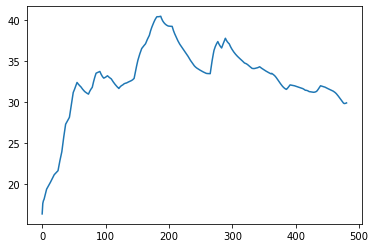

In [14]:
plt.plot(fullSoil)

## Test run at ARM point maybe not outputting all CLUBB variables properly 

In [8]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'
fileStart = 'IHistClm50Sp.f09_g17.singlePoint_ARMptsMode_30years.001.clm2.h1.2006-'

months = np.asarray(['01','02','03','04','05','06','07','08','09','10','11','12'])
days   = np.asarray(['16','15','17','16','16','15','15','14','13','13','12','12'])

for iFile in range(len(months)): 
    filename =dataDir+fileStart+months[iFile]+'-'+days[iFile]+'-00000.nc'
    
    ds = xr.open_dataset(filename,decode_times=True)
    
    if iFile==0: 
        fullDS = ds 
    else: 
        fullDS = xr.concat([fullDS,ds], dim='time')


In [13]:
fullDS['time']  = fullDS.indexes['time'].to_datetimeindex()


<ipython-input-13-dfbbe03dd23e>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  fullDS['time']  = fullDS.indexes['time'].to_datetimeindex()


Text(0.5, 1.0, 'Soil Water 10 CM ')

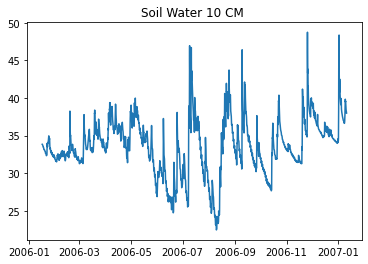

In [15]:
plt.plot(fullDS.time.values, np.squeeze(fullDS.SOILWATER_10CM.values))
plt.title('Soil Water 10 CM')


In [16]:
fullDS


<xarray.Dataset>
Dimensions:         (hist_interval: 2, lat: 1, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lon: 1, time: 17280)
Coordinates:
  * lat             (lat) float32 37.225132
  * lon             (lon) float32 262.5
  * levdcmp         (levdcmp) float32 1.0
  * levlak          (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levsoi          (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levgrnd         (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time            (time) datetime64[ns] 2006-01-16 ... 2007-01-10T23:30:28....
Dimensions without coordinates: hist_interval
Data variables:
    mcdate          (time) int32 20060116 20060116 ... 20070110 20070110
    mcsec           (time) int32 0 1800 3600 5400 ... 79200 81000 82800 84600
    mdcur           (time) int32 9870 9870 9870 9870 ... 10229 10229 10229 10229
    mscur           (time) int32 0 1800 3600 5400 ... 79200 81000 82800 84600
    nstep           (time) int32 473760 473761 473762 ... 491037 491038 491039
    time_bounds     (time, hist_interval) object 2006-01-15 23:30:00 ... 2007...
    date_written    (time) |S16 b'02/24/21' b'02/24/21' ... b'02/24/21'
    time_written    (time) |S16 b'21:11:56' b'21:11:56' ... b'21:21:53'
    area            (time, lat, lon) float32 11598.45 11598.45 ... 11598.45
    landfrac        (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    landmask        (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    pftmask         (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    nbedrock        (time, lat, lon) float64 20.0 20.0 20.0 ... 20.0 20.0 20.0
    QP2_CLUBB       (time, lat, lon) float32 4.427117e-09 ... 1.8426558e-09
    QSOIL           (time, lat, lon) float32 3.4725883e-06 ... 2.6511277e-06
    QVEGE           (time, lat, lon) float32 2.1136877e-14 ... 1.1445236e-06
    QVEGT           (time, lat, lon) float32 1.14633245e-08 ... 8.6050557e-07
    SOILWATER_10CM  (time, lat, lon) float32 33.8506 33.845688 ... 37.99178
    THLP2_CLUBB     (time, lat, lon) float32 0.0037072233 ... 0.0009573897
    THLPQP_CLUBB    (time, lat, lon) float32 9.656254e-07 ... 2.7543305e-07
    UP2_CLUBB       (time, lat, lon) float32 inf inf inf inf ... inf inf inf inf
    WP2QP_CLUBB     (time, lat, lon) float32 -7.577009e-28 ... 8.884546e-29
    WP2THLP_CLUBB   (time, lat, lon) float32 -inf inf inf inf ... inf inf inf
    WP2_CLUBB       (time, lat, lon) float32 inf inf inf inf ... inf inf inf inf
    WP3_CLUBB       (time, lat, lon) float32 -inf -inf -inf ... -inf -inf -inf
    WP4_CLUBB       (time, lat, lon) float32 inf inf inf inf ... inf inf inf inf
    WPQP2_CLUBB     (time, lat, lon) float32 6.2850836e-12 ... -1.2687588e-11
    WPQP_CLUBB      (time, lat, lon) float32 2.8842758e-06 ... 3.88804e-06
    WPTHLP2_CLUBB   (time, lat, lon) float32 0.00017886469 ... 6.3050156e-06
    WPTHLPQP_CLUBB  (time, lat, lon) float32 9.6230245e-08 ... 2.6026598e-08
    WPTHLP_CLUBB    (time, lat, lon) float32 0.0078107193 ... 0.0044501005
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 02/24/21 21:11:56
    source:                                    Community Terrestrial Systems ...
    hostname:                                  hobart
    username:                                  mdfowler
    version:                                   ctsm5.1.dev021-17-ga2e2011b
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   IHistClm50Sp.f09_g17.singlePoi...
    Surface_dataset:                           surfdata_0.9x1.25_hist_16pfts_...
    Initial_conditions_dataset:                arbitrary initialization
    PFT_phy

Text(0.5, 1.0, 'THLP2_CLUBB')

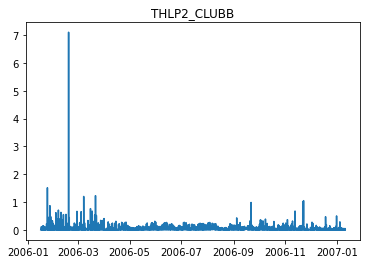

In [18]:
var = 'THLP2_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)


Text(0.5, 1.0, 'QP2_CLUBB')

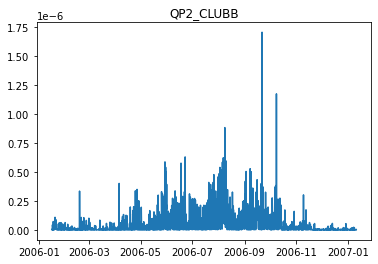

In [19]:
var = 'QP2_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)


Text(0.5, 1.0, 'WP2_CLUBB')

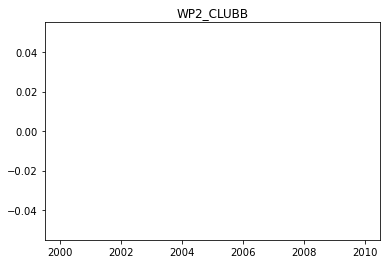

In [20]:
var = 'WP2_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)


In [24]:
print(fullDS['WP2_CLUBB'].values)

[[[inf]]

 [[inf]]

 [[inf]]

 ...

 [[inf]]

 [[inf]]

 [[inf]]]


Text(0.5, 1.0, 'WP3_CLUBB')

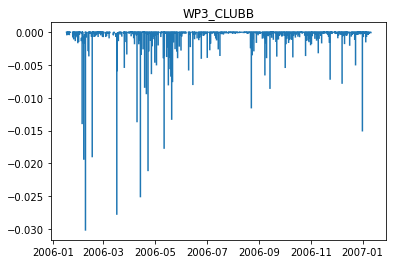

In [21]:
var = 'WP3_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)


Text(0.5, 1.0, 'WP4_CLUBB')

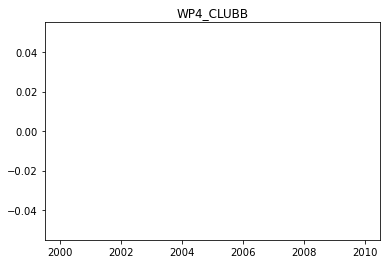

In [22]:
var = 'WP4_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)


In [25]:
print(fullDS['WP4_CLUBB'].values)

[[[inf]]

 [[inf]]

 [[inf]]

 ...

 [[inf]]

 [[inf]]

 [[inf]]]


Text(0.5, 1.0, 'WP2THLP_CLUBB')

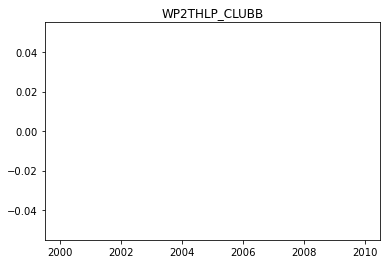

In [26]:
var = 'WP2THLP_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)


In [27]:
print(fullDS['WP2THLP_CLUBB'].values)

[[[-inf]]

 [[ inf]]

 [[ inf]]

 ...

 [[ inf]]

 [[ inf]]

 [[ inf]]]


Text(0.5, 1.0, 'WP2QP_CLUBB')

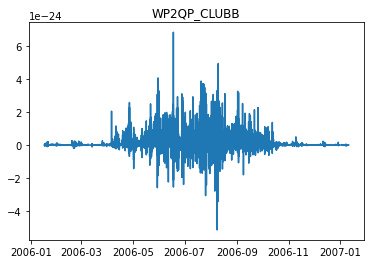

In [28]:
var = 'WP2QP_CLUBB'
plt.plot(fullDS.time.values, np.squeeze(fullDS[var].values))
plt.title(var)



## Maybe fixed the issue
Ustar needs to be saved out a certain way and I wasn't doing that, so the bare ground portion of this gridcell was using a ustar value of 1e36 and throwing a lot of stuff off. <br><br>
Test run using ARM97 IOP.

In [6]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'

camFile = dataDir+'FSCAM.T42_T42.arm97.clasp_ARM97_CTSMmodsTest.001.cam.h0.1997-06-18-84585.nc'
clmFile = dataDir+'FSCAM.T42_T42.arm97.clasp_ARM97_CTSMmodsTest.001.clm2.h1.1997-06-18-84585.nc'

camDS = xr.open_dataset(camFile, decode_times=True)
camDS['time']  = camDS.indexes['time'].to_datetimeindex()

clmDS = xr.open_dataset(clmFile, decode_times=True)
clmDS['time']  = clmDS.indexes['time'].to_datetimeindex()



<ipython-input-6-d5ccfb02651b>:7: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS['time']  = camDS.indexes['time'].to_datetimeindex()
<ipython-input-6-d5ccfb02651b>:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS['time']  = clmDS.indexes['time'].to_datetimeindex()


Text(0.5, 1.0, 'Temperature variance (THLP2)')

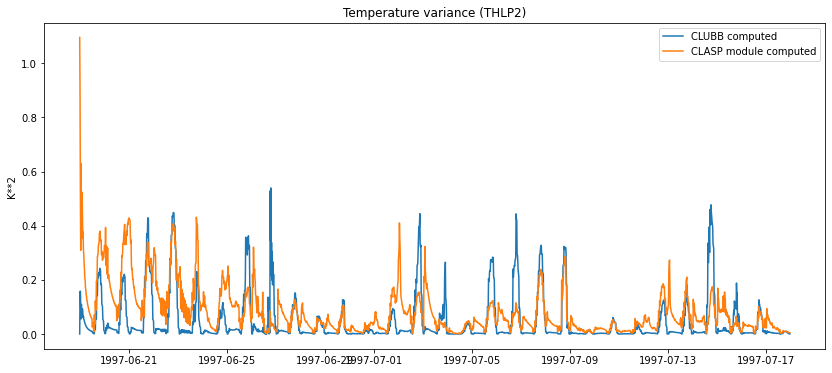

In [15]:
fig,axs = plt.subplots(1,1, figsize=(14,6))

plt.plot(camDS['time'].values, np.squeeze(camDS['THLP2_CLUBB'].values)[:,-1])
plt.plot(clmDS['time'].values, np.squeeze(clmDS['THLP2_CLUBB'].values))
plt.legend(['CLUBB computed','CLASP module computed'])
plt.ylabel('K**2')
plt.title('Temperature variance (THLP2)')

Text(0.5, 1.0, 'Moisture variance (RTP2)')

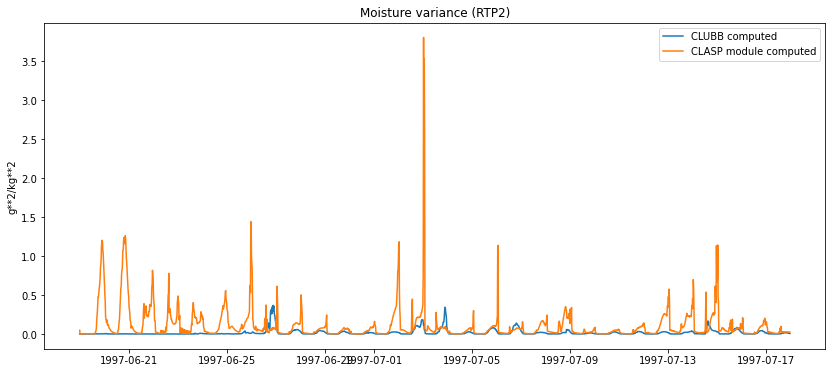

In [29]:
fig,axs = plt.subplots(1,1, figsize=(14,6))

plt.plot(camDS['time'].values, np.squeeze(camDS['RTP2_CLUBB'].values)[:,-1])
plt.plot(clmDS['time'].values, np.squeeze(clmDS['QP2_CLUBB'].values)*1000000)
plt.legend(['CLUBB computed','CLASP module computed'])
plt.ylabel('g**2/kg**2')
plt.title('Moisture variance (RTP2)')

Text(0.5, 1.0, 'Horizontal wind variance (UP2)')

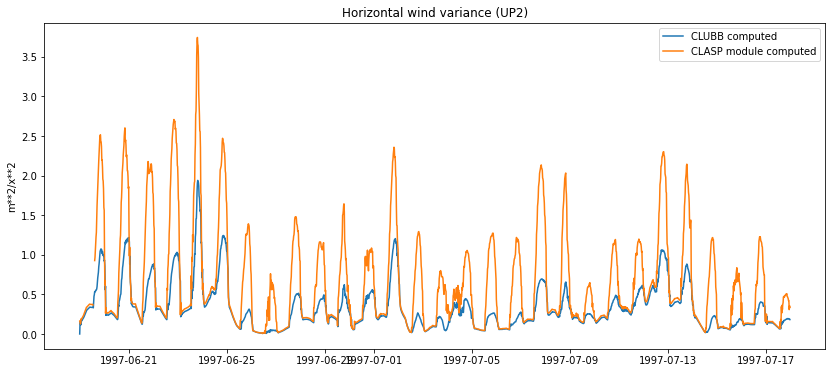

In [20]:
fig,axs = plt.subplots(1,1, figsize=(14,6))

plt.plot(camDS['time'].values, np.squeeze(camDS['UP2_CLUBB'].values)[:,-1])
plt.plot(clmDS['time'].values, np.squeeze(clmDS['UP2_CLUBB'].values))
plt.legend(['CLUBB computed','CLASP module computed'])
plt.ylabel('m**2/s**2')
plt.title('Horizontal wind variance (UP2)')

Text(0.5, 1.0, 'Vertical wind variance (WP2)')

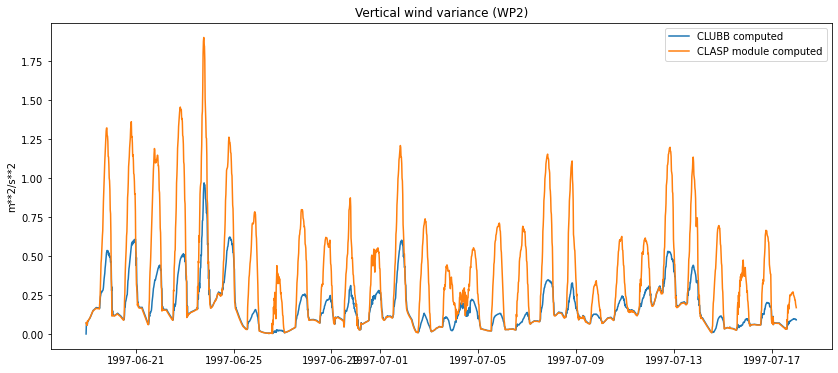

In [21]:
fig,axs = plt.subplots(1,1, figsize=(14,6))

plt.plot(camDS['time'].values, np.squeeze(camDS['WP2_CLUBB'].values)[:,-1])
plt.plot(clmDS['time'].values, np.squeeze(clmDS['WP2_CLUBB'].values))
plt.legend(['CLUBB computed','CLASP module computed'])
plt.ylabel('m**2/s**2')
plt.title('Vertical wind variance (WP2)')

Text(0.5, 1.0, 'Vertical wind skew (WP3)')

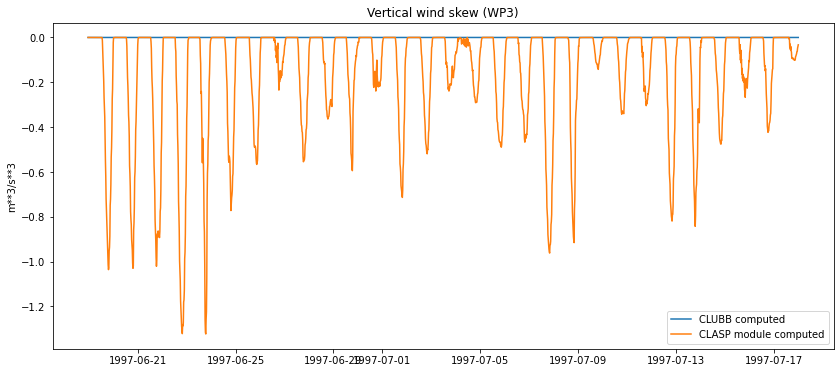

In [24]:
fig,axs = plt.subplots(1,1, figsize=(14,6))

plt.plot(camDS['time'].values, np.squeeze(camDS['WP3_CLUBB'].values)[:,-1])
plt.plot(clmDS['time'].values, np.squeeze(clmDS['WP3_CLUBB'].values))
plt.legend(['CLUBB computed','CLASP module computed'])
plt.ylabel('m**3/s**3')
plt.title('Vertical wind skew (WP3)')


Text(0.5, 1.0, 'Precipitation')

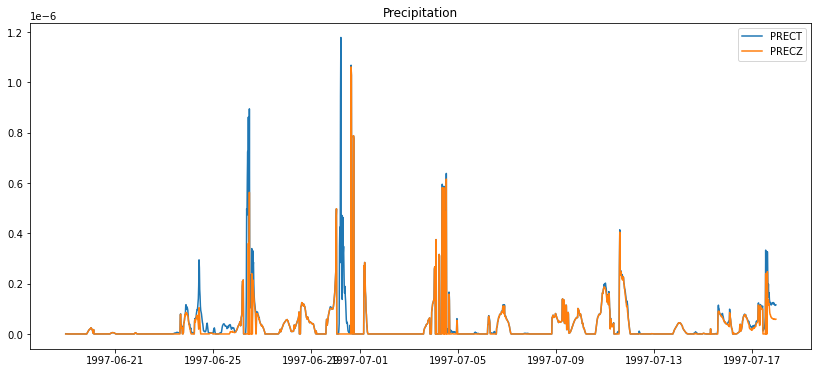

In [32]:
fig,axs = plt.subplots(1,1, figsize=(14,6))

plt.plot(camDS['time'].values, np.squeeze(camDS['PRECT'].values))
plt.plot(camDS['time'].values, np.squeeze(camDS['PRECZ'].values))
plt.legend(['PRECT','PRECZ'])
plt.ylabel('')
plt.title('Precipitation')


## Having some issues with thlpqp (opposite sign...?) 

In [2]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'

camFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.003.cam.h0.2015-06-04-00000.nc'
clmFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.003.clm2.h1.2015-06-04-00000.nc'

camDS = xr.open_dataset(camFile, decode_times=True)
clmDS = xr.open_dataset(clmFile, decode_times=True)


In [7]:
camDS['time'].values[90:165]

array([cftime.DatetimeNoLeap(2015, 6, 5, 6, 0, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 6, 20, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 6, 40, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 7, 0, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 7, 20, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 7, 40, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 8, 0, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 8, 20, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 8, 40, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 9, 0, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 9, 20, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 9, 40, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 10, 0, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 10, 20, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 10, 40, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 11, 0, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 11, 20, 0, 0),
       cftime.DatetimeNoLeap(2015, 6, 5, 11, 40, 0, 0),
       cft

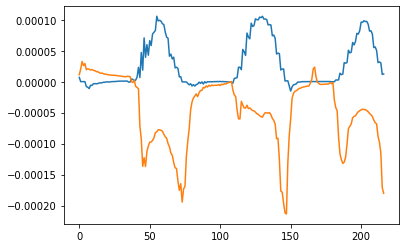

In [41]:
plt.plot(np.squeeze(camDS['RTPTHLP_CLUBB'].values)[:,-1])
plt.plot(np.squeeze(clmDS['THLPQP_CLUBB'].values))

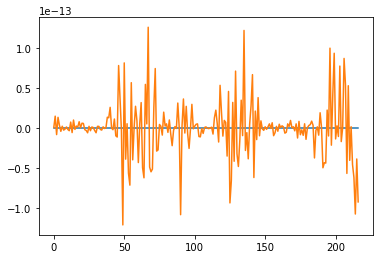

In [53]:
plt.plot(np.squeeze(camDS['WP2THLP_CLUBB'].values)[:,-1])
plt.plot(np.squeeze(clmDS['WP2THLP_CLUBB'].values))

In [227]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'

camFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.003-noIrrig.cam.h0.2015-06-04-00000.nc'
clmFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.003-noIrrig.clm2.h1.2015-06-04-00000.nc'

camDS = xr.open_dataset(camFile, decode_times=True)
clmDS = xr.open_dataset(clmFile, decode_times=True)



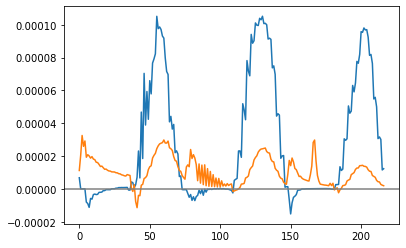

In [229]:
plt.plot(np.squeeze(camDS['RTPTHLP_CLUBB'].values)[:,-1])
plt.plot(np.squeeze(clmDS['THLPQP_CLUBB'].values))
plt.axhline(0,color='gray')


In [39]:
np.sqrt(np.squeeze(clmDS['THLP2_CLUBB'].values))*np.sqrt(np.squeeze(clmDS['QP2_CLUBB'].values))

array([2.51159054e-05, 9.30856113e-05, 1.01408717e-04, 8.96004713e-05,
       2.03141753e-04, 1.42609308e-04, 1.33832669e-04, 1.30793691e-04,
       1.17487143e-04, 1.12308684e-04, 1.04982770e-04, 9.83987484e-05,
       9.04791523e-05, 8.77475395e-05, 8.16889442e-05, 7.63406642e-05,
       7.57704620e-05, 7.08442749e-05, 6.67443383e-05, 6.63598912e-05,
       6.22838634e-05, 5.98298539e-05, 5.86813476e-05, 5.61655797e-05,
       5.43809729e-05, 5.41609188e-05, 5.13552877e-05, 4.96718676e-05,
       4.75715788e-05, 4.58460854e-05, 4.35800684e-05, 4.22924895e-05,
       4.04593084e-05, 3.89154811e-05, 3.77437609e-05, 3.63559302e-05,
       3.53449541e-05, 1.83461598e-05, 2.61421319e-05, 3.51045383e-05,
       2.61168661e-05, 3.80081037e-05, 3.93867958e-05, 1.92380190e-04,
       1.44967722e-04, 1.92768741e-04, 2.43656134e-04, 2.67888681e-04,
       2.26618053e-04, 2.73132609e-04, 2.60835484e-04, 2.77682499e-04,
       3.12216929e-04, 3.11836426e-04, 3.07066104e-04, 3.25426896e-04,
      

In [173]:
# Weights at ARM site: 

weights = np.asarray([ 3.237421461195519E-003,
                      1.463820825006332E-003, 
                      6.571512203554175E-003, 
                      0.255558263724396, 
                      0.221671438449820, 
                      0.487410961328913, 
                      2.255482090863874E-002,
                      8.849021290897581E-006, 
                      2.949673763632527E-006,
                      2.949673763632527E-006,
                      2.064771599379917E-006,
                      8.849021642526094E-007, 
                      7.570315279472156E-004,
                      2.523438426490719E-004,
                      2.523438426490719E-004, 
                      1.261719213245359E-004,
                      1.261719213245359E-004])

q_2m = np.asarray([1.601843320513298E-002,
                  1.124739583750434E-002,
                  1.123929772724677E-002,
                  1.127793973202431E-002,
                  1.127673895400324E-002,
                  1.127478142477418E-002,
                  1.389141234097726E-002,
                  1.136567001196693E-002,
                  1.136567001196693E-002,
                  1.136567001196693E-002,
                  1.136567001196693E-002,
                  1.136567001196693E-002,
                  1.158839730179016E-002,
                  1.158839730179016E-002,
                  1.158839730179016E-002,
                  1.158839730179016E-002,
                  1.158839730179016E-002])

theta = np.asarray([309.843573888590,
                   310.221457604603,
                   310.189776536537,
                   309.422870157901,
                   309.421747844975,
                   309.485384330739,
                   307.637433564458,
                   309.888726080458,
                   309.888726080458,
                   309.888726080458,
                   309.888726080458,
                   309.888726080458,
                   309.803271730523,
                   309.803271730523,
                   309.803271730523,
                   309.803271730523,
                   309.803271730523])


In [174]:
len(weights)

17

In [175]:
gridMean_q2m = (np.sum(q_2m*weights)/np.sum(weights))

gridMean_q2m

0.011350600500007423

In [176]:
gridMean_theta = (np.sum(theta*weights)/np.sum(weights))
gridMean_theta

309.4209761792044

In [177]:
qDiff = q_2m - gridMean_q2m




In [178]:
thetaDiff = theta - gridMean_theta


In [188]:
(np.sum((qDiff)*weights)/np.sum(weights))

4.500259578982496e-19

In [116]:
print('  Weight        qDiff       thetaDiff')
print(' -------       -------      ---------')
for i in range(17):
    print('%.3e    %10.3e    %10.3e' % (weights[i], qDiff[i], thetaDiff[i]))

  Weight        qDiff       thetaDiff
 -------       -------      ---------
3.237e-03     4.668e-03     4.226e-01
1.464e-03    -1.032e-04     8.005e-01
6.572e-03    -1.113e-04     7.688e-01
2.556e-01    -7.266e-05     1.894e-03
2.217e-01    -7.386e-05     7.717e-04
4.874e-01    -7.582e-05     6.441e-02
2.255e-02     2.541e-03    -1.784e+00
8.849e-06     1.507e-05     4.677e-01
2.950e-06     1.507e-05     4.677e-01
2.950e-06     1.507e-05     4.677e-01
2.065e-06     1.507e-05     4.677e-01
8.849e-07     1.507e-05     4.677e-01
7.570e-04     2.378e-04     3.823e-01
2.523e-04     2.378e-04     3.823e-01
2.523e-04     2.378e-04     3.823e-01
1.262e-04     2.378e-04     3.823e-01
1.262e-04     2.378e-04     3.823e-01


**Log file from case without irrigation**

In [204]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'

camFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.003-noIrrig.cam.h0.2015-06-04-00000.nc'
clmFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.003-noIrrig.clm2.h1.2015-06-04-00000.nc'

camDS = xr.open_dataset(camFile, decode_times=True)
clmDS = xr.open_dataset(clmFile, decode_times=True)


In [20]:
logFile = dataDir+'lnd.log.210304-102421'

with open(logFile) as f:
    lines = f.readlines()
    
    

In [21]:
patchWeight_lines = np.asarray(lines[1933:1949]).astype('str')
patchWeight_lines



array([' MDF: patch weight:   3.237421461195520E-003\n',
       ' MDF: patch weight:   1.463820825006332E-003\n',
       ' MDF: patch weight:   6.571512203554175E-003\n',
       ' MDF: patch weight:   0.255558263724396     \n',
       ' MDF: patch weight:   0.221671438449820     \n',
       ' MDF: patch weight:   0.509965782237551     \n',
       ' MDF: patch weight:   8.849021290897581E-006\n',
       ' MDF: patch weight:   2.949673763632527E-006\n',
       ' MDF: patch weight:   2.949673763632527E-006\n',
       ' MDF: patch weight:   2.064771599379917E-006\n',
       ' MDF: patch weight:   8.849021642526094E-007\n',
       ' MDF: patch weight:   7.570315279472156E-004\n',
       ' MDF: patch weight:   2.523438426490719E-004\n',
       ' MDF: patch weight:   2.523438426490719E-004\n',
       ' MDF: patch weight:   1.261719213245359E-004\n',
       ' MDF: patch weight:   1.261719213245359E-004\n'], dtype='<U45')

In [22]:
patchWeights = []

for iWgt in range(len(patchWeight_lines)):
    strArr = patchWeight_lines[iWgt].split('   ')
    weight = strArr[1].split('\n')
    
    patchWeights = np.append(patchWeights, float(weight[0]))
    

In [95]:

patchTheta = []
patchQ     = []

for iLines in range(len(lines)):
    if lines[iLines].startswith('       patch value of Tv:')==True:
        strArr     = lines[iLines].split(':')
        theta      = strArr[1].split('\n')
        patchTheta = np.append(patchTheta, float(theta[0]))
        
    if lines[iLines].startswith('       patch value of q:')==True:
        strArr = lines[iLines].split(':')
        q      = strArr[1].split('\n')
        patchQ = np.append(patchQ, float(q[0]))


# Reshape to be timestep x patch (confirmed this works)
patchTheta = np.reshape(patchTheta, [217,16])
patchQ     = np.reshape(patchQ, [217,16])



In [131]:
# If want to sort by weight...

indSort = np.argsort(patchWeights)
indSort[::-1]


array([ 5,  3,  4,  2,  0,  1, 11, 13, 12, 15, 14,  6,  8,  7,  9, 10])

In [130]:
patchWeights[indSort[::-1]]

array([5.09965782e-01, 2.55558264e-01, 2.21671438e-01, 6.57151220e-03,
       3.23742146e-03, 1.46382083e-03, 7.57031528e-04, 2.52343843e-04,
       2.52343843e-04, 1.26171921e-04, 1.26171921e-04, 8.84902129e-06,
       2.94967376e-06, 2.94967376e-06, 2.06477160e-06, 8.84902164e-07])

In [191]:
# What is grid mean theta at each time step? 
gridMeanTheta = (np.sum(patchTheta*patchWeights,axis=1)/np.sum(patchWeights))


Text(0, 0.5, 'Specific Humidity (kg/kg)')

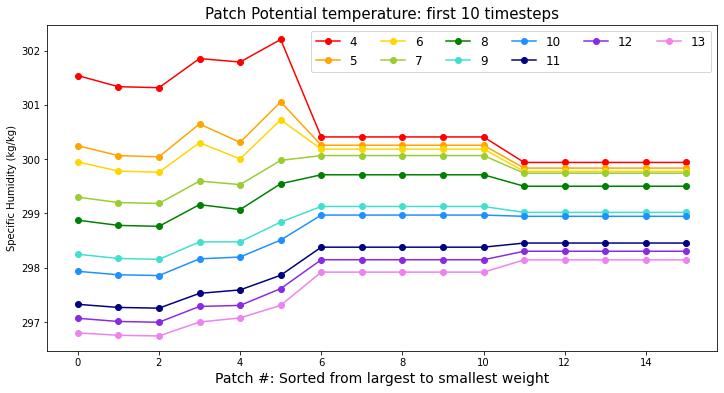

In [158]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))
                        
colors = np.asarray(['red','orange','gold','yellowgreen','green','turquoise','dodgerblue','navy','blueviolet','violet'])    

for iLine in range(10):
    i = iLine+4
    ax1.plot(np.arange(16), patchTheta[i,indSort[::-1]],'o-',color=colors[iLine],label=i)
    #ax1.axhline(gridMeanQ[i],color=colors[iLine],linestyle='--',label='GridMean')
    
ax1.legend(ncol=6,fontsize=12)
ax1.set_title('Patch Potential temperature: first 10 timesteps', fontsize=15)
ax1.set_xlabel('Patch #: Sorted from largest to smallest weight',fontsize=14)
ax1.set_ylabel('Specific Humidity (kg/kg)')

#ax1.set_ylim([0.0035,0.0058])



In [147]:
# What is grid mean Q at each time step? 
gridMeanQ = (np.sum(patchQ*patchWeights,axis=1)/np.sum(patchWeights))


(0.0035, 0.0058)

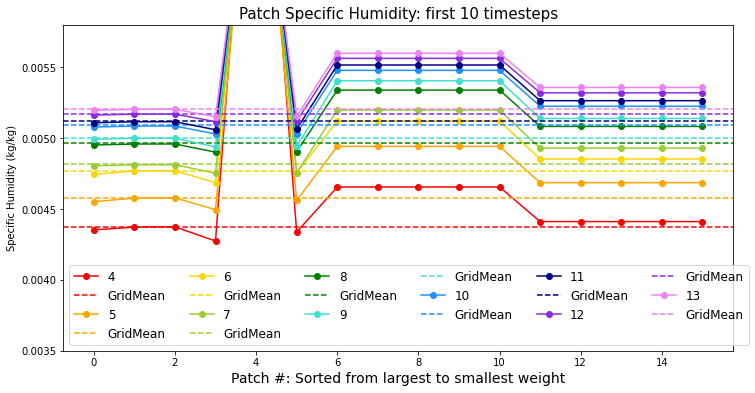

In [190]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))
                        
colors = np.asarray(['red','orange','gold','yellowgreen','green','turquoise','dodgerblue','navy','blueviolet','violet'])    

for iLine in range(10):
    i = iLine+4
    ax1.plot(np.arange(16), patchQ[i,indSort[::-1]],'o-',color=colors[iLine],label=i)
    ax1.axhline(gridMeanQ[i],color=colors[iLine],linestyle='--',label='GridMean')
    
ax1.legend(ncol=6,fontsize=12)
ax1.set_title('Patch Specific Humidity: first 10 timesteps', fontsize=15)
ax1.set_xlabel('Patch #: Sorted from largest to smallest weight',fontsize=14)
ax1.set_ylabel('Specific Humidity (kg/kg)')

ax1.set_ylim([0.0035,0.0058])


Text(0, 0.5, 'Specific Humidity (kg/kg)')

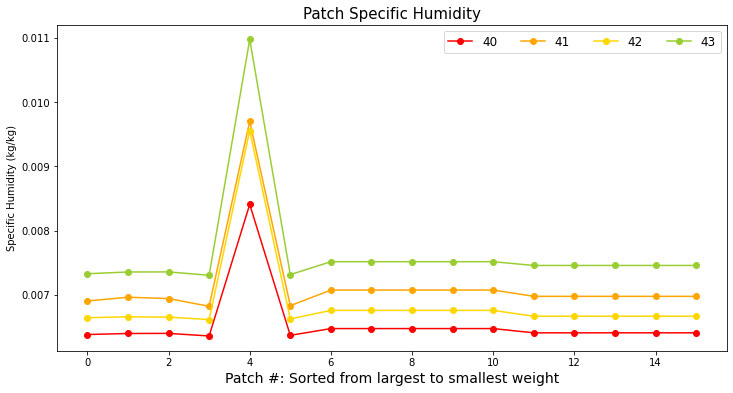

In [235]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))
                        
colors = np.asarray(['red','orange','gold','yellowgreen','green','turquoise','dodgerblue','navy','blueviolet','violet'])    

times = np.asarray([40,41,42,43])

for iLine in range(len(times)):
    i = times[iLine]
    ax1.plot(np.arange(16), patchQ[i,indSort[::-1]],'o-',color=colors[iLine],label=i)
   # ax1.axhline(gridMeanQ[i],color=colors[iLine],linestyle='--',label='GridMean')
    
ax1.legend(ncol=6,fontsize=12)
ax1.set_title('Patch Specific Humidity', fontsize=15)
ax1.set_xlabel('Patch #: Sorted from largest to smallest weight',fontsize=14)
ax1.set_ylabel('Specific Humidity (kg/kg)')

#ax1.set_ylim([0.0035,0.0058])



In [200]:
patchQdiff     = np.full([np.shape(gridMeanQ)[0], len(patchWeights)], np.nan)
patchThetaDiff = np.full([np.shape(gridMeanQ)[0], len(patchWeights)], np.nan)

for iPatch in range(len(patchWeights)):
    patchQdiff[:,iPatch] = patchQ[:,iPatch] - gridMeanQ 
    
    patchThetaDiff[:,iPatch] = patchTheta[:,iPatch] - gridMeanTheta


In [208]:
patchVariance = patchThetaDiff * patchQdiff

gridMeanVariance = (np.sum(patchVariance*patchWeights,axis=1)/np.sum(patchWeights))

In [210]:
final_thlpqp = np.squeeze(clmDS['THLPQP_CLUBB'].values)

gridmean_thlpqp = final_thlpqp - gridMeanVariance

In [231]:
final_thlpqp[40:50]

array([-7.6070255e-06, -1.1397334e-05, -3.8898938e-06, -4.0993332e-06,
        2.2978425e-06,  2.8124255e-06,  6.3588614e-06,  6.9119965e-06,
        8.0866330e-06,  1.1769532e-05], dtype=float32)

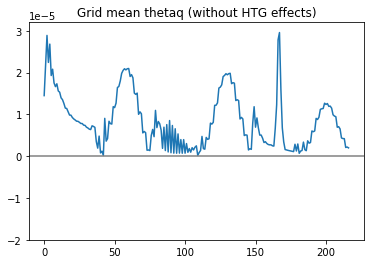

In [218]:
plt.plot(gridmean_thlpqp)
plt.title('Grid mean theta''q'' (without HTG effects)')
plt.ylim([-2e-5, 3.2e-5])
plt.axhline(0,color='grey')

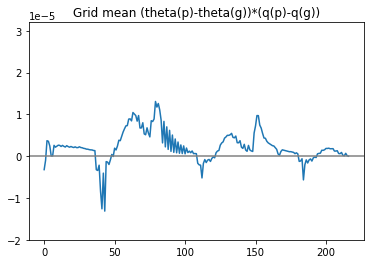

In [219]:
plt.plot(gridMeanVariance)
plt.title('Grid mean (theta(p)-theta(g))*(q(p)-q(g))')
plt.ylim([-2e-5, 3.2e-5])
plt.axhline(0,color='grey')


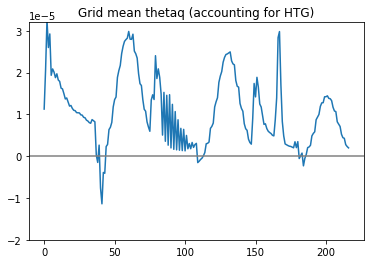

In [222]:
plt.plot(gridmean_thlpqp+gridMeanVariance)
plt.title('Grid mean theta''q'' (accounting for HTG)')
plt.ylim([-2e-5, 3.2e-5])
plt.axhline(0,color='grey')



## Look into thlp2 as well

In [23]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/'

camFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.NoIrrig-testTHLP2.cam.h0.2015-06-04-00000.nc'
clmFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.NoIrrig-testTHLP2.clm2.h1.2015-06-04-00000.nc'

camDS = xr.open_dataset(camFile, decode_times=True)
clmDS = xr.open_dataset(clmFile, decode_times=True)



In [24]:
logFile = dataDir+'NoIrrig-testTHLP2.lnd.log.210305-090949'

with open(logFile) as f:
    lines = f.readlines()
    

In [25]:

patchTHLP2  = []
patchTheta  = []
patchTv     = []

for iLines in range(len(lines)):
    if lines[iLines].startswith(' MDF:  patch value of thlp2')==True:
        strArr     = lines[iLines].split(':')
        thlp2      = strArr[2].split('\n')
        patchTHLP2 = np.append(patchTHLP2, float(thlp2[0]))
        
    if lines[iLines].startswith('       patch value of theta')==True:
        strArr = lines[iLines].split(':')
        theta      = strArr[1].split('\n')
        patchTheta = np.append(patchTheta, float(theta[0]))

    if lines[iLines].startswith('       patch value of Tv')==True:
        strArr = lines[iLines].split(':')
        Tv      = strArr[1].split('\n')
        patchTv = np.append(patchTv, float(Tv[0]))


# Reshape to be timestep x patch (confirmed this works)
patchTHLP2 = np.reshape(patchTHLP2, [217,16])
patchTheta = np.reshape(patchTheta, [217,16])
patchTv    = np.reshape(patchTv, [217,16])


In [26]:
# What is grid mean theta at each time step? 
#   Define patchWeights from lnd.log file above 
gridMeanTv = (np.sum(patchTv*patchWeights,axis=1)/np.sum(patchWeights))


Text(0.5, 1.0, 'Patch-level virtual potential temperature')

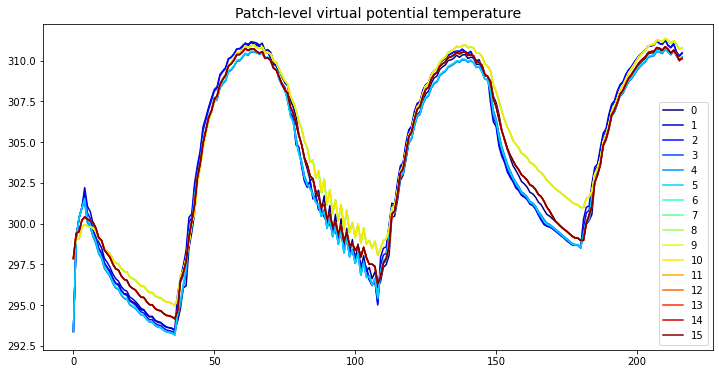

In [39]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

n = 16
colors = plt.cm.jet(np.linspace(0,1,n))

for iPatch in range(16):
    ax1.plot(patchTv[:,iPatch],color=colors[iPatch],label=iPatch)
ax1.legend() 


ax1.set_title('Patch-level virtual potential temperature', fontsize=14)
    

## Test run that *uses* CTSM moments

In [22]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/UseCTSMmods_Irrig_SrfFluxAvg/'

# File naming conventions: 
startFile       = 'FSCAM.T42_T42.arm97.clasp_useAndre_useCTSMmods-Irrig-SrfFluxAvg_startDay'  

middleFile_CAM  = '.cam.h0.2015-'
middleFile_CLM  = '.clm2.h1.2015-'
endFile         = '-00000.nc'

# Month/day also factor into naming convention (since these are run for ~2 days and second day is used)
months    = np.ones(31)*6
months[0] = 5
days      = np.arange(0,6)
days[0]   = 31


In [25]:
days

array([31,  1,  2,  3,  4,  5])

In [26]:
# Now read in each daily file, and save the appropriate second day to an xr dataset: 

for iDay in range(4):
    
    # Define full file names 
    if iDay==0:
        camFile    = dataDir+startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CAM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+'-00172.nc'
        clmFile    = dataDir+startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CLM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+'-00172.nc'        
    else:
        camFile    = dataDir+startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CAM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
        clmFile    = dataDir+startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CLM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile

    # ---------------------- 
    # Read in CAM data
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(camFile, decode_times=True,engine='scipy') as cam_DS:
        cam_DS['time']  = cam_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(cam_DS['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            camDS = cam_DS.isel(time=iTimeRange)
        else:
            camDS = xr.concat([camDS,cam_DS.isel(time=iTimeRange)], dim='time')


    # ---------------------- 
    # Read in CLM data
    # ----------------------
    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(clmFile, decode_times=True,engine='scipy') as clm_DS:
        clm_DS['time']  = clm_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(clm_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            clmDS = clm_DS.isel(time=iTimeRange)
        else:
            clmDS = xr.concat([clmDS,clm_DS.isel(time=iTimeRange)], dim='time')
            

    

<ipython-input-26-f74cc912dab5>:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  cam_DS['time']  = cam_DS.indexes['time'].to_datetimeindex()
<ipython-input-26-f74cc912dab5>:37: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clm_DS['time']  = clm_DS.indexes['time'].to_datetimeindex()
<ipython-input-26-f74cc912dab5>:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time betwee

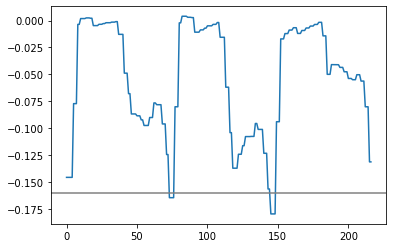

In [30]:
plt.plot(np.squeeze(cam_DS['RTPTHLP_CLUBB'].values)[:,-1])
plt.axhline(-0.16,color='grey')

## What if only one patch type? Do CLUBB and CLASP agree then? 

In [2]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/BareGroundOnly/'
camFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-BareGroundOnly.002.cam.h0.2015-06-01-00000.nc'
clmFile = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-BareGroundOnly.002.clm2.h1.2015-06-01-00000.nc'

camDS_bareGrnd = xr.open_dataset(camFile,decode_times=True)
camDS_bareGrnd['time']  = camDS_bareGrnd.indexes['time'].to_datetimeindex()
clmDS_bareGrnd = xr.open_dataset(clmFile,decode_times=True)
clmDS_bareGrnd['time']  = clmDS_bareGrnd.indexes['time'].to_datetimeindex()


<ipython-input-2-2685e9321061>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS_bareGrnd['time']  = camDS_bareGrnd.indexes['time'].to_datetimeindex()
<ipython-input-2-2685e9321061>:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS_bareGrnd['time']  = clmDS_bareGrnd.indexes['time'].to_datetimeindex()


In [3]:
# Convert times to a pandas datetime array, with UTC timezone
times = pd.DatetimeIndex(camDS_bareGrnd.time.values, tz='UTC')

# Now convert those to Central time 
times_local = times.tz_convert(tz='US/Central')


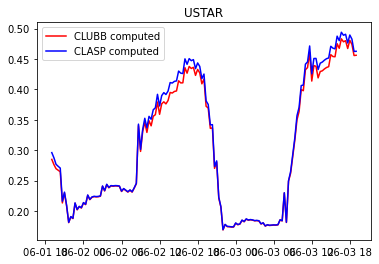

In [4]:
plt.plot(times_local[72::],np.squeeze(camDS_bareGrnd.USTAR.values)[72::],'r', label='CLUBB computed')
plt.plot(times_local[72::],np.squeeze(clmDS_bareGrnd.USTAR.values)[72::],'b', label='CLASP computed')

plt.title('USTAR')

plt.legend()


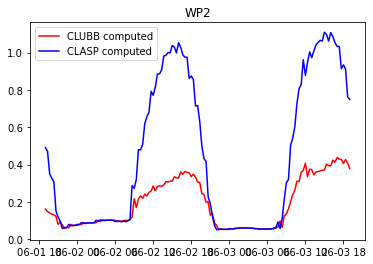

In [5]:
plt.plot(times_local[72::],np.squeeze(camDS_bareGrnd.WP2_CLUBB.values)[72::,-1],'r', label='CLUBB computed')
plt.plot(times_local[72::],np.squeeze(clmDS_bareGrnd.WP2_CLUBB.values)[72::],'b', label='CLASP computed')

plt.title('WP2')

plt.legend()


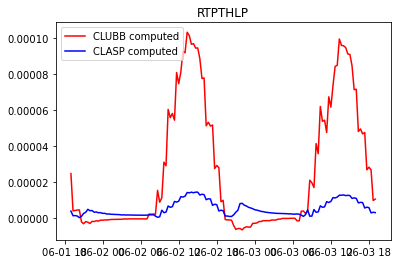

In [6]:
plt.plot(times_local[72::],np.squeeze(camDS_bareGrnd.RTPTHLP_CLUBB.values)[72::,-1],'r', label='CLUBB computed')
plt.plot(times_local[72::],np.squeeze(clmDS_bareGrnd.THLPQP_CLUBB.values)[72::],'b', label='CLASP computed')

plt.title('RTPTHLP')

plt.legend()



In [7]:
## Can we look at zeta then? That must be the biggest difference... 
atmlogFile_bareGrnd = dataDir+'atm.log.210310-160958'
lndlogFile_bareGrnd  = dataDir+'lnd.log.210310-160958'

with open(atmlogFile_bareGrnd) as f:
    atmLines_bareGrnd = f.readlines()
    
with open(lndlogFile_bareGrnd) as f:
    lndLines_bareGrnd = f.readlines()


In [8]:
# First get where each output for a timestep ends

endTimeLines = []

for iLines in range(len(atmLines_bareGrnd)):
    if atmLines_bareGrnd[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines = np.append(endTimeLines,iLines)
        
timestepZeta_atm_bareGrnd = []
for iTimes in range(len(endTimeLines)):
    
    if iTimes==0: 
        timestepSection = atmLines_bareGrnd[0:int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_bareGrnd = np.append(timestepZeta_atm_bareGrnd, float(zeta[0]))
    else:
        timestepSection = atmLines_bareGrnd[int(endTimeLines[iTimes-1]):int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_bareGrnd = np.append(timestepZeta_atm_bareGrnd, float(zeta[0]))
    

In [16]:
timestepZeta_lnd_bareGrnd   = []

for iLines in range(len(lndLines_bareGrnd)):
    if lndLines_bareGrnd[iLines].startswith(' MDF:   zeta(p)')==True:
        strArr     = lndLines_bareGrnd[iLines].split('=')
        zeta       = strArr[1].split('\n')
        timestepZeta_lnd_bareGrnd = np.append(timestepZeta_lnd_bareGrnd, float(zeta[0]))  



In [18]:
print(timestepZeta_atm_bareGrnd[34:37])
print(timestepZeta_lnd_bareGrnd[34:37])

[-0.03590116 -0.03431805 -0.03806476]
[0.5 0.5 0.5]


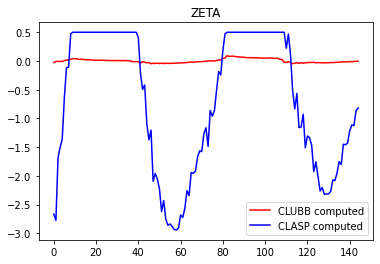

In [20]:
plt.plot(timestepZeta_atm_bareGrnd[72::],'r', label='CLUBB computed')
plt.plot(timestepZeta_lnd_bareGrnd[72::],'b', label='CLASP computed')

plt.title('ZETA')

plt.legend()
#plt.ylim([-1,0.75])


In [21]:
## Differences in terms of zeta?
timestepZldis_lnd_bareGrnd   = []
timestepThv_lnd_bareGrnd   = []

for iLines in range(len(lndLines_bareGrnd)):
    if lndLines_bareGrnd[iLines].startswith(' MDF:  value of zldis(p) =')==True:
        strArr     = lndLines_bareGrnd[iLines].split('=')
        zldis       = strArr[1].split('\n')
        timestepZldis_lnd_bareGrnd = np.append(timestepZldis_lnd_bareGrnd, float(zldis[0]))  

    if lndLines_bareGrnd[iLines].startswith('       value of forc_th(c) =')==True:
        strArr     = lndLines_bareGrnd[iLines].split('=')
        thv       = strArr[1].split('\n')
        timestepThv_lnd_bareGrnd = np.append(timestepThv_lnd_bareGrnd, float(thv[0]))         

            

In [22]:
# For some reason this is looping three times.... zldis stays the same though 
timestepZldis_lnd_bareGrnd = np.reshape(timestepZldis_lnd_bareGrnd, [217,3])
timestepThv_lnd_bareGrnd   = np.reshape(timestepThv_lnd_bareGrnd, [217, 3])


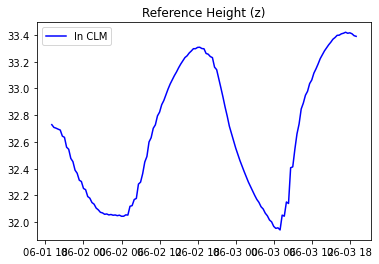

In [26]:
plt.plot(times_local[72::],timestepZldis_lnd_bareGrnd[72::,0],'b', label='In CLM')
#plt.axhline(1,color='r',label='CLUBB z_const')

plt.title('Reference Height (z)')

plt.legend()



In [27]:
np.nanmean(timestepZldis_lnd_bareGrnd[:,0])

32.478160089183504

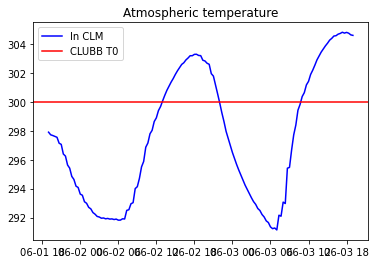

In [28]:
#plt.plot(times_local[72::],np.squeeze(camDS_bareGrnd.USTAR.values)[72::],'r', label='CLUBB computed')
plt.plot(times_local[72::],timestepThv_lnd_bareGrnd[72::,0],'b', label='In CLM')
plt.axhline(300,color='r',label='CLUBB T0')

plt.title('Atmospheric temperature')

plt.legend()




### Case setting z_const = 32.5 in CLUBB calculation

In [29]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/BareGroundOnly/'
camFile_bare_zconst32 = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-BareGroundOnly.Zconst32.cam.h0.2015-06-01-00000.nc'
clmFile_bare_zconst32 = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-BareGroundOnly.Zconst32.clm2.h1.2015-06-01-00000.nc'

camDS_bare_zconst32 = xr.open_dataset(camFile_bare_zconst32,decode_times=True)
camDS_bare_zconst32['time']  = camDS_bare_zconst32.indexes['time'].to_datetimeindex()

clmDS_bare_zconst32 = xr.open_dataset(clmFile_bare_zconst32,decode_times=True)
clmDS_bare_zconst32['time']  = clmDS_bare_zconst32.indexes['time'].to_datetimeindex()



<ipython-input-29-6c2819c025ec>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS_bare_zconst32['time']  = camDS_bare_zconst32.indexes['time'].to_datetimeindex()
<ipython-input-29-6c2819c025ec>:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS_bare_zconst32['time']  = clmDS_bare_zconst32.indexes['time'].to_datetimeindex()


In [30]:
## Can we look at zeta then? That must be the biggest difference... 
atmlogFile_bare_zconst32 = dataDir+'atm.log.210311-094202'
lndlogFile_bare_zconst32 = dataDir+'lnd.log.210311-094202'

with open(atmlogFile_bare_zconst32) as f:
    atmLines_bare_zconst32 = f.readlines()
    
with open(lndlogFile_bare_zconst32) as f:
    lndLines_bare_zconst32 = f.readlines()

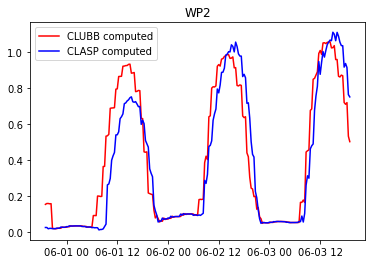

In [31]:
# plt.plot(times_local[72::],np.squeeze(camDS.WP2_CLUBB.values)[72::,-1],'r', label='CLUBB computed')
# plt.plot(times_local[72::],np.squeeze(clmDS.WP2_CLUBB.values)[72::],'b', label='CLASP computed')
plt.plot(times_local,np.squeeze(camDS_bare_zconst32.WP2_CLUBB.values)[:,-1],'r', label='CLUBB computed')
plt.plot(times_local,np.squeeze(clmDS_bare_zconst32.WP2_CLUBB.values)[:],'b', label='CLASP computed')

plt.title('WP2')

plt.legend()


In [32]:
# First get where each output for a timestep ends

endTimeLines = []

for iLines in range(len(atmLines_bare_zconst32)):
    if atmLines_bare_zconst32[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines = np.append(endTimeLines,iLines)
        
timestepZeta_atm_bare_zconst32 = []
for iTimes in range(len(endTimeLines)):
    
    if iTimes==0: 
        timestepSection = atmLines_bare_zconst32[0:int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_bare_zconst32 = np.append(timestepZeta_atm_bare_zconst32, float(zeta[0]))
    else:
        timestepSection = atmLines_bare_zconst32[int(endTimeLines[iTimes-1]):int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_bare_zconst32 = np.append(timestepZeta_atm_bare_zconst32, float(zeta[0]))
    

In [34]:
timestepZeta_lnd_bare_zconst32   = []

for iLines in range(len(lndLines_bare_zconst32)):
    if lndLines_bare_zconst32[iLines].startswith(' MDF:   zeta(p)')==True:
        strArr     = lndLines_bare_zconst32[iLines].split('=')
        zeta       = strArr[1].split('\n')
        timestepZeta_lnd_bare_zconst32 = np.append(timestepZeta_lnd_bare_zconst32, float(zeta[0]))  




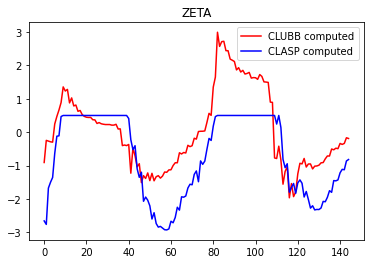

In [35]:
plt.plot(timestepZeta_atm_bare_zconst32[72::],'r', label='CLUBB computed')
plt.plot(timestepZeta_lnd_bare_zconst32[72::],'b', label='CLASP computed')

plt.title('ZETA')

plt.legend()
#plt.ylim([-1,0.75])


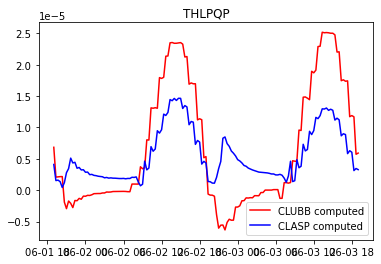

In [36]:
plt.plot(times_local[72::],np.squeeze(camDS_bare_zconst32.RTPTHLP_CLUBB.values)[72::,-1],'r', label='CLUBB computed')
plt.plot(times_local[72::],np.squeeze(clmDS_bare_zconst32.THLPQP_CLUBB.values)[72::],'b', label='CLASP computed')

plt.title('THLPQP')

plt.legend()


## Check out cases with other land surface types too...

In [38]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/IrrigCropOnly/'
camFile_irrigCrop = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-IrrigCropOnly.cam.h0.2015-06-01-00000.nc'
clmFile_irrigCrop = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-IrrigCropOnly.clm2.h1.2015-06-01-00000.nc'

camDS_irrigCrop = xr.open_dataset(camFile_irrigCrop,decode_times=True)
camDS_irrigCrop['time']  = camDS_irrigCrop.indexes['time'].to_datetimeindex()

clmDS_irrigCrop = xr.open_dataset(clmFile_irrigCrop,decode_times=True)
clmDS_irrigCrop['time']  = clmDS_irrigCrop.indexes['time'].to_datetimeindex()

## Can we look at zeta?
atmlogFile_irrigCrop = dataDir+'atm.log.210311-145800'
lndlogFile_irrigCrop = dataDir+'lnd.log.210311-145800'

with open(atmlogFile_irrigCrop) as f:
    atmLines_irrigCrop = f.readlines()
    
with open(lndlogFile_irrigCrop) as f:
    lndLines_irrigCrop = f.readlines()


<ipython-input-38-3cd575db7c14>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS_irrigCrop['time']  = camDS_irrigCrop.indexes['time'].to_datetimeindex()
<ipython-input-38-3cd575db7c14>:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS_irrigCrop['time']  = clmDS_irrigCrop.indexes['time'].to_datetimeindex()


In [39]:
# First get where each output for a timestep ends

endTimeLines = []

for iLines in range(len(atmLines_irrigCrop)):
    if atmLines_irrigCrop[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines = np.append(endTimeLines,iLines)
        
timestepZeta_atm_irrigCrop = []
for iTimes in range(len(endTimeLines)):
    
    if iTimes==0: 
        timestepSection = atmLines_irrigCrop[0:int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_irrigCrop = np.append(timestepZeta_atm_irrigCrop, float(zeta[0]))
    else:
        timestepSection = atmLines_irrigCrop[int(endTimeLines[iTimes-1]):int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_irrigCrop = np.append(timestepZeta_atm_irrigCrop, float(zeta[0]))
        

In [40]:
timestepZeta_lnd_irrigCrop   = []

for iLines in range(len(lndLines_irrigCrop)):
    if lndLines_irrigCrop[iLines].startswith(' MDF:   zeta(p)')==True:
        strArr     = lndLines_irrigCrop[iLines].split('=')
        zeta       = strArr[1].split('\n')
        timestepZeta_lnd_irrigCrop = np.append(timestepZeta_lnd_irrigCrop, float(zeta[0]))  
        


In [47]:
# Irrig applies two patches, but the nat_pft patch has zero weight 
timestepZeta_lnd_irrigCrop = np.reshape(timestepZeta_lnd_irrigCrop,[217,2])



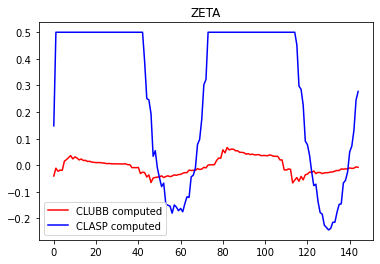

In [54]:
plt.plot(timestepZeta_atm_irrigCrop[72::],'r', label='CLUBB computed')
plt.plot(np.squeeze(clmDS_irrigCrop.ZETA.values)[72::],'b', label='CLASP computed')
#plt.plot(timestepZeta_lnd_irrigCrop[72::,1],'b', label='CLASP computed')

plt.title('ZETA')

plt.legend()
#plt.ylim([-1,0.75])


In [56]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/TreeOnly/'
camFile_tree = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-TreeOnly.cam.h0.2015-06-01-00000.nc'
clmFile_tree = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-TreeOnly.clm2.h1.2015-06-01-00000.nc'

camDS_tree = xr.open_dataset(camFile_tree,decode_times=True)
camDS_tree['time']  = camDS_tree.indexes['time'].to_datetimeindex()

clmDS_tree = xr.open_dataset(clmFile_tree,decode_times=True)
clmDS_tree['time']  = clmDS_tree.indexes['time'].to_datetimeindex()

## Can we look at zeta?
atmlogFile_tree = dataDir+'atm.log.210311-160157'
lndlogFile_tree = dataDir+'lnd.log.210311-160157'

with open(atmlogFile_tree) as f:
    atmLines_tree = f.readlines()
    
with open(lndlogFile_tree) as f:
    lndLines_tree = f.readlines()


<ipython-input-56-0d9bbc7aad14>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS_tree['time']  = camDS_tree.indexes['time'].to_datetimeindex()
<ipython-input-56-0d9bbc7aad14>:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS_tree['time']  = clmDS_tree.indexes['time'].to_datetimeindex()


In [57]:
# First get where each output for a timestep ends

endTimeLines = []

for iLines in range(len(atmLines_tree)):
    if atmLines_tree[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines = np.append(endTimeLines,iLines)
        
timestepZeta_atm_tree = []
for iTimes in range(len(endTimeLines)):
    
    if iTimes==0: 
        timestepSection = atmLines_tree[0:int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_tree = np.append(timestepZeta_atm_tree, float(zeta[0]))
    else:
        timestepSection = atmLines_tree[int(endTimeLines[iTimes-1]):int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_tree = np.append(timestepZeta_atm_tree, float(zeta[0]))
        

In [60]:
timestepZeta_lnd_tree   = []

for iLines in range(len(lndLines_tree)):
    if lndLines_tree[iLines].startswith(' MDF:   zeta(p)')==True:
        strArr     = lndLines_tree[iLines].split('=')
        zeta       = strArr[1].split('\n')
        timestepZeta_lnd_tree = np.append(timestepZeta_lnd_tree, float(zeta[0]))  
        

In [62]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/TempFiles/C3grassOnly/'
camFile_grass = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-C3grassOnly.cam.h0.2015-06-01-00000.nc'
clmFile_grass = dataDir+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev-irrig-srfFlxAvg_startDay0601.SrfMod-C3grassOnly.clm2.h1.2015-06-01-00000.nc'

camDS_grass = xr.open_dataset(camFile_grass,decode_times=True)
camDS_grass['time']  = camDS_grass.indexes['time'].to_datetimeindex()

clmDS_grass = xr.open_dataset(clmFile_grass,decode_times=True)
clmDS_grass['time']  = clmDS_grass.indexes['time'].to_datetimeindex()

## Can we look at zeta?
atmlogFile_grass = dataDir+'atm.log.210311-151421'
lndlogFile_grass = dataDir+'lnd.log.210311-151421'

with open(atmlogFile_grass) as f:
    atmLines_grass = f.readlines()
    
with open(lndlogFile_grass) as f:
    lndLines_grass = f.readlines()


<ipython-input-62-bb6d3123df99>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS_grass['time']  = camDS_grass.indexes['time'].to_datetimeindex()
<ipython-input-62-bb6d3123df99>:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS_grass['time']  = clmDS_grass.indexes['time'].to_datetimeindex()


In [63]:
# First get where each output for a timestep ends

endTimeLines = []

for iLines in range(len(atmLines_grass)):
    if atmLines_grass[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines = np.append(endTimeLines,iLines)
        
timestepZeta_atm_grass = []
for iTimes in range(len(endTimeLines)):
    
    if iTimes==0: 
        timestepSection = atmLines_grass[0:int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_grass = np.append(timestepZeta_atm_grass, float(zeta[0]))
    else:
        timestepSection = atmLines_grass[int(endTimeLines[iTimes-1]):int(endTimeLines[iTimes])]
        
        # Zeta stays at a constant value for timesteps, so just use the first  
        lineZeta = [item for item in timestepSection if item.startswith(' MDF:   Value of zeta  = ')]
        strArr    = lineZeta[0].split('=')
        zeta      = strArr[1].split('\n')
        # Save value of zeta at this time step from ATM model 
        timestepZeta_atm_grass = np.append(timestepZeta_atm_grass, float(zeta[0]))
        

In [65]:
timestepZeta_lnd_grass   = []

for iLines in range(len(lndLines_grass)):
    if lndLines_grass[iLines].startswith(' MDF:   zeta(p)')==True:
        strArr     = lndLines_grass[iLines].split('=')
        zeta       = strArr[1].split('\n')
        timestepZeta_lnd_grass = np.append(timestepZeta_lnd_grass, float(zeta[0]))  
        

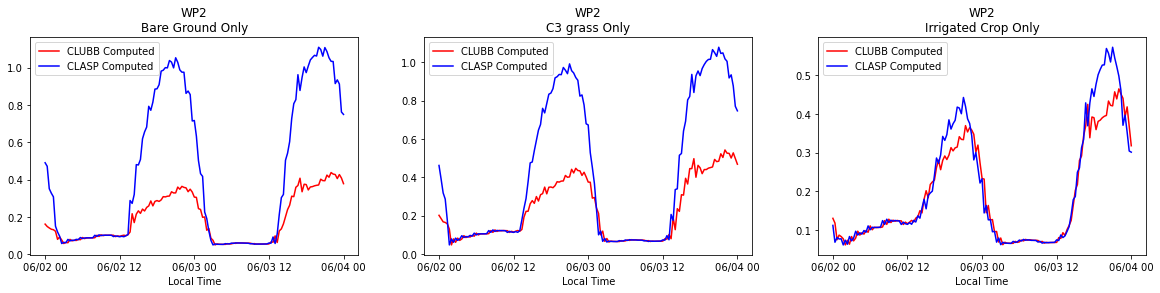

In [93]:
## Plot each case: 

fig, axs = plt.subplots(1,3, figsize=(20, 4))
axs      = axs.ravel()
# Format for time on x-axis
myFmt = mdates.DateFormatter('%m/%d %H')

axs[0].plot(times_local[72::], np.squeeze(camDS_bareGrnd['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[0].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[0].legend(loc='upper left')
axs[0].set_title('WP2\nBare Ground Only')
axs[0].set_xlabel('Local Time')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[1].plot(times_local[72::], np.squeeze(camDS_grass['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[1].plot(times_local[72::], np.squeeze(clmDS_grass['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[1].legend(loc='upper left')
axs[1].set_title('WP2\nC3 grass Only')
axs[1].set_xlabel('Local Time')
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(times_local[72::], np.squeeze(camDS_irrigCrop['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[2].plot(times_local[72::], np.squeeze(clmDS_irrigCrop['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[2].legend(loc='upper left')
axs[2].set_title('WP2\nIrrigated Crop Only')
axs[2].set_xlabel('Local Time')
axs[2].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))

# axs[2].plot(times_local[72::], np.squeeze(camDS_tree['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
# axs[2].plot(times_local[72::], np.squeeze(clmDS_tree['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
# axs[2].legend(loc='upper left')
# axs[2].set_title('WP2\nTree Only')
# axs[2].set_xlabel('Local Time')
# axs[2].xaxis.set_major_formatter(myFmt)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))



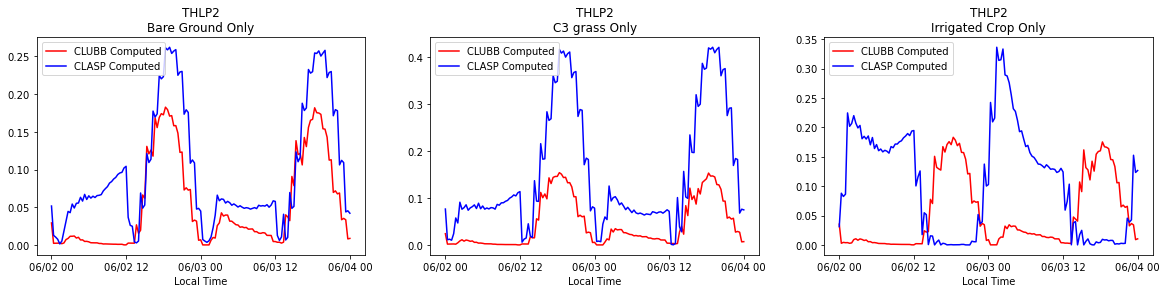

In [95]:
## Plot each case: 

fig, axs = plt.subplots(1,3, figsize=(20, 4))
axs      = axs.ravel()
# Format for time on x-axis
myFmt = mdates.DateFormatter('%m/%d %H')

axs[0].plot(times_local[72::], np.squeeze(camDS_bareGrnd['THLP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[0].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['THLP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[0].legend(loc='upper left')
axs[0].set_title('THLP2\nBare Ground Only')
axs[0].set_xlabel('Local Time')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[1].plot(times_local[72::], np.squeeze(camDS_grass['THLP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[1].plot(times_local[72::], np.squeeze(clmDS_grass['THLP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[1].legend(loc='upper left')
axs[1].set_title('THLP2\nC3 grass Only')
axs[1].set_xlabel('Local Time')
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(times_local[72::], np.squeeze(camDS_irrigCrop['THLP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[2].plot(times_local[72::], np.squeeze(clmDS_irrigCrop['THLP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[2].legend(loc='upper left')
axs[2].set_title('THLP2\nIrrigated Crop Only')
axs[2].set_xlabel('Local Time')
axs[2].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))

# axs[2].plot(times_local[72::], np.squeeze(camDS_tree['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
# axs[2].plot(times_local[72::], np.squeeze(clmDS_tree['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
# axs[2].legend(loc='upper left')
# axs[2].set_title('WP2\nTree Only')
# axs[2].set_xlabel('Local Time')
# axs[2].xaxis.set_major_formatter(myFmt)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))




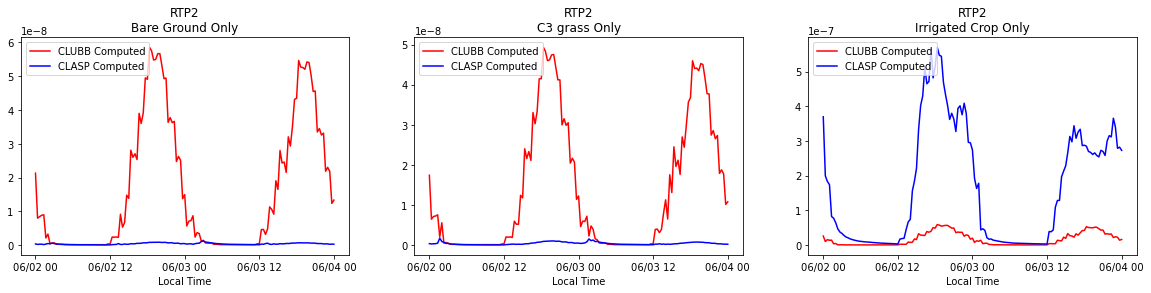

In [97]:
## Plot each case: 

fig, axs = plt.subplots(1,3, figsize=(20, 4))
axs      = axs.ravel()
# Format for time on x-axis
myFmt = mdates.DateFormatter('%m/%d %H')

axs[0].plot(times_local[72::], np.squeeze(camDS_bareGrnd['RTP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[0].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['QP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[0].legend(loc='upper left')
axs[0].set_title('RTP2\nBare Ground Only')
axs[0].set_xlabel('Local Time')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[1].plot(times_local[72::], np.squeeze(camDS_grass['RTP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[1].plot(times_local[72::], np.squeeze(clmDS_grass['QP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[1].legend(loc='upper left')
axs[1].set_title('RTP2\nC3 grass Only')
axs[1].set_xlabel('Local Time')
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(times_local[72::], np.squeeze(camDS_irrigCrop['RTP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[2].plot(times_local[72::], np.squeeze(clmDS_irrigCrop['QP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[2].legend(loc='upper left')
axs[2].set_title('RTP2\nIrrigated Crop Only')
axs[2].set_xlabel('Local Time')
axs[2].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))

# axs[2].plot(times_local[72::], np.squeeze(camDS_tree['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
# axs[2].plot(times_local[72::], np.squeeze(clmDS_tree['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
# axs[2].legend(loc='upper left')
# axs[2].set_title('WP2\nTree Only')
# axs[2].set_xlabel('Local Time')
# axs[2].xaxis.set_major_formatter(myFmt)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))



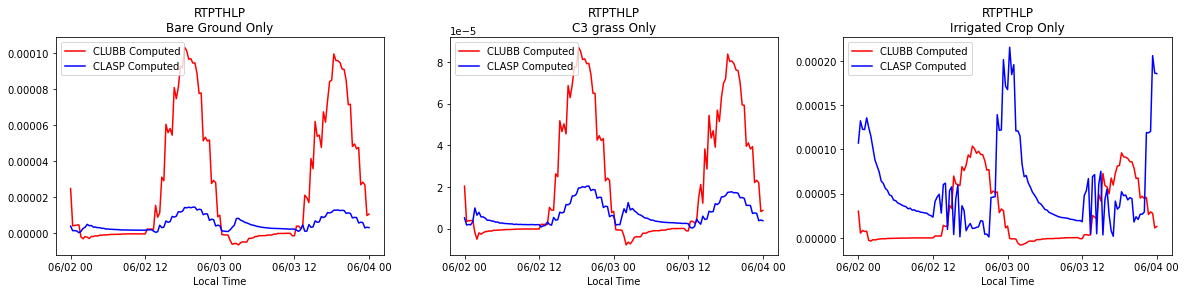

In [98]:
## Plot each case: 

fig, axs = plt.subplots(1,3, figsize=(20, 4))
axs      = axs.ravel()
# Format for time on x-axis
myFmt = mdates.DateFormatter('%m/%d %H')

axs[0].plot(times_local[72::], np.squeeze(camDS_bareGrnd['RTPTHLP_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[0].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['THLPQP_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[0].legend(loc='upper left')
axs[0].set_title('RTPTHLP\nBare Ground Only')
axs[0].set_xlabel('Local Time')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[1].plot(times_local[72::], np.squeeze(camDS_grass['RTPTHLP_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[1].plot(times_local[72::], np.squeeze(clmDS_grass['THLPQP_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[1].legend(loc='upper left')
axs[1].set_title('RTPTHLP\nC3 grass Only')
axs[1].set_xlabel('Local Time')
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(times_local[72::], np.squeeze(camDS_irrigCrop['RTPTHLP_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[2].plot(times_local[72::], np.squeeze(clmDS_irrigCrop['THLPQP_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[2].legend(loc='upper left')
axs[2].set_title('RTPTHLP\nIrrigated Crop Only')
axs[2].set_xlabel('Local Time')
axs[2].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))

# axs[2].plot(times_local[72::], np.squeeze(camDS_tree['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
# axs[2].plot(times_local[72::], np.squeeze(clmDS_tree['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
# axs[2].legend(loc='upper left')
# axs[2].set_title('WP2\nTree Only')
# axs[2].set_xlabel('Local Time')
# axs[2].xaxis.set_major_formatter(myFmt)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))


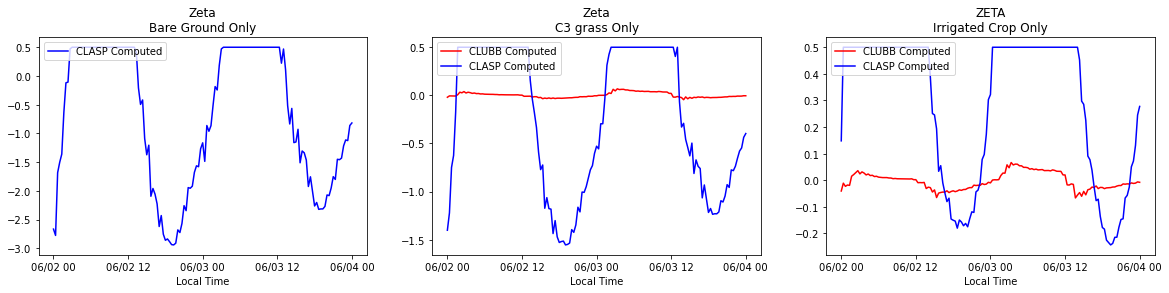

In [101]:
## Plot each case: 

fig, axs = plt.subplots(1,3, figsize=(20, 4))
axs      = axs.ravel()
# Format for time on x-axis
myFmt = mdates.DateFormatter('%m/%d %H')

#axs[0].plot(times_local[72::], timestepZeta_atm_bareGrnd[72:],'r', label='CLUBB Computed')
axs[0].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['ZETA'].values)[72:],'b', label='CLASP Computed')
axs[0].legend(loc='upper left')
axs[0].set_title('Zeta\nBare Ground Only')
axs[0].set_xlabel('Local Time')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[1].plot(times_local[72::], timestepZeta_atm_grass[72:],'r', label='CLUBB Computed')
axs[1].plot(times_local[72::], np.squeeze(clmDS_grass['ZETA'].values)[72:],'b', label='CLASP Computed')
axs[1].legend(loc='upper left')
axs[1].set_title('Zeta\nC3 grass Only')
axs[1].set_xlabel('Local Time')
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(times_local[72::], timestepZeta_atm_irrigCrop[72:],'r', label='CLUBB Computed')
axs[2].plot(times_local[72::], np.squeeze(clmDS_irrigCrop['ZETA'].values)[72:],'b', label='CLASP Computed')
axs[2].legend(loc='upper left')
axs[2].set_title('ZETA\nIrrigated Crop Only')
axs[2].set_xlabel('Local Time')
axs[2].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))

# axs[2].plot(times_local[72::], np.squeeze(camDS_tree['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
# axs[2].plot(times_local[72::], np.squeeze(clmDS_tree['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
# axs[2].legend(loc='upper left')
# axs[2].set_title('WP2\nTree Only')
# axs[2].set_xlabel('Local Time')
# axs[2].xaxis.set_major_formatter(myFmt)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(5))




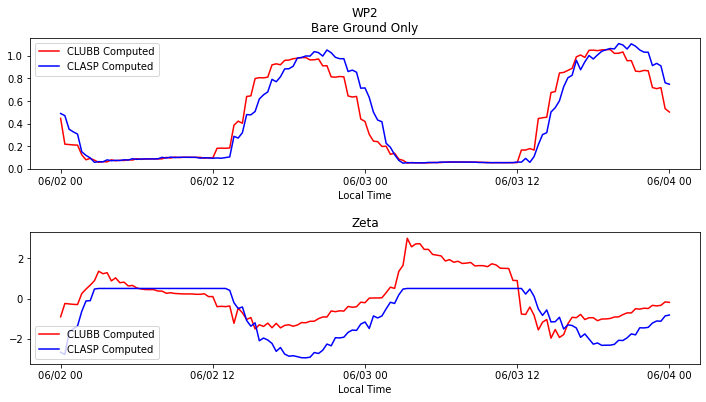

In [116]:
# Plot comparison of zeta and WP2

fig, axs = plt.subplots(2,1, figsize=(12, 6))
axs      = axs.ravel()
fig.subplots_adjust(hspace=0.48)
# Format for time on x-axis
myFmt = mdates.DateFormatter('%m/%d %H')

axs[0].plot(times_local[72::], np.squeeze(camDS_bare_zconst32['WP2_CLUBB'].values)[72:,-1],'r', label='CLUBB Computed')
axs[0].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['WP2_CLUBB'].values)[72:],'b', label='CLASP Computed')
axs[0].legend(loc='upper left')
axs[0].set_title('WP2\nBare Ground Only')
axs[0].set_xlabel('Local Time')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

axs[1].plot(times_local[72::], timestepZeta_atm_bare_zconst32[72:],'r', label='CLUBB Computed')
axs[1].plot(times_local[72::], np.squeeze(clmDS_bareGrnd['ZETA'].values)[72:],'b', label='CLASP Computed')
axs[1].legend(loc='lower left')
axs[1].set_title('Zeta')
axs[1].set_xlabel('Local Time')
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))
#axs[1].axhline(0,color='k')
#axs[1].set_ylim([-1,1])
